In [2]:
import pandas as pd

import os

In [3]:
os.getcwd()  #see current directory

'/resources/Pandas_utube'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'Sales_Data',
 'Utube_pandas_Part2.ipynb',
 'Utube_tutorial.ipynb',
 'modified.txt',
 'modified_pokemon_data.csv',
 'pokemon_data.csv']

In [5]:
os.chdir('Sales_Data') # change directory
os.getcwd()

'/resources/Pandas_utube/Sales_Data'

In [6]:
files = os.listdir('/resources/Pandas_utube/Sales_Data') # see files in directory as a list
files

['.ipynb_checkpoints',
 'Data_2019.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [7]:
Data_2019 = pd.DataFrame()   # create empty dataframe

In [8]:
# iterate through all files and concatenate the dataframes
for file in files[1:13]:
    df = pd.read_csv(file)
    Data_2019 = pd.concat([Data_2019,df], axis = 0)

In [9]:
Data_2019.to_csv("Data_2019.csv", index = False)

In [10]:
Data_2019.head(100000) #notice index resets each month

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
99995,217889,Wired Headphones,1,11.99,06/02/19 21:06,"25 Center St, San Francisco, CA 94016"
99996,217890,ThinkPad Laptop,1,999.99,06/23/19 15:43,"846 2nd St, New York City, NY 10001"
99997,217891,AA Batteries (4-pack),1,3.84,06/13/19 20:03,"700 10th St, Boston, MA 02215"
99998,217892,AA Batteries (4-pack),1,3.84,06/30/19 21:38,"826 Cherry St, Austin, TX 73301"


In [11]:
print(Data_2019.shape) #see the number of rows
Data_2019.dtypes

(1062670, 6)


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [12]:
Data_2019.rename(columns={'Order Date': 'Order Date & Time'}, inplace=True)
Data_2019
Data_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [13]:
# Create new rows for month, day, year & time
Data_2019['Order Month']=''
Data_2019['Order Day']=''
Data_2019['Order Year']=''
Data_2019['Order Time']=''

Data_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,,,,
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",,,,
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",,,,
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",,,,


In [14]:
print(Data_2019.shape)
print(Data_2019.isnull().sum())
Data_2019.dropna(axis = 0, inplace = True)
print(Data_2019.shape)

(1062670, 10)
Order ID             3070
Product              3070
Quantity Ordered     3070
Price Each           3070
Order Date & Time    3070
Purchase Address     3070
Order Month             0
Order Day               0
Order Year              0
Order Time              0
dtype: int64
(1059600, 10)


In [15]:
print(Data_2019.duplicated().sum())
Data_2019.drop_duplicates(inplace = True)
print(Data_2019.shape)
Data_2019.head()

873913
(185687, 10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",,,,
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",,,,
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",,,,
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",,,,
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",,,,


In [16]:
Data_2019.reset_index(drop = True, inplace = True) # reset index post dropping NaN and duplicate rows
Data_2019.head(100000)

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",,,,
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",,,,
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",,,,
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",,,,
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",,,,
...,...,...,...,...,...,...,...,...,...,...
99995,218495,ThinkPad Laptop,1,999.99,06/14/19 09:06,"378 Center St, Los Angeles, CA 90001",,,,
99996,218496,USB-C Charging Cable,1,11.95,06/19/19 15:26,"612 2nd St, Los Angeles, CA 90001",,,,
99997,218497,Lightning Charging Cable,1,14.95,06/24/19 06:58,"522 Johnson St, Dallas, TX 75001",,,,
99998,218498,Bose SoundSport Headphones,1,99.99,06/24/19 08:07,"299 1st St, Atlanta, GA 30301",,,,


In [17]:
# See whether there is still NaN values

missing_data = Data_2019.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Order ID
False    185687
Name: Order ID, dtype: int64

Product
False    185687
Name: Product, dtype: int64

Quantity Ordered
False    185687
Name: Quantity Ordered, dtype: int64

Price Each
False    185687
Name: Price Each, dtype: int64

Order Date & Time
False    185687
Name: Order Date & Time, dtype: int64

Purchase Address
False    185687
Name: Purchase Address, dtype: int64

Order Month
False    185687
Name: Order Month, dtype: int64

Order Day
False    185687
Name: Order Day, dtype: int64

Order Year
False    185687
Name: Order Year, dtype: int64

Order Time
False    185687
Name: Order Time, dtype: int64



In [18]:
# test before for loop on entire df

test = str(Data_2019.loc[0,'Order Date & Time'])
print(test)
print("Month is ", test[0:2])
print("Day is ", test[3:5])
print("Year is ", '20'+test[6:8])
print("Time is ", test[9:15])

04/19/19 08:46
Month is  04
Day is  19
Year is  2019
Time is  08:46


In [19]:
for index, row in Data_2019.iterrows():
    string = str(Data_2019.loc[index,'Order Date & Time'])
    Data_2019.loc[index,'Order Month'] = string[0:2]
    Data_2019.loc[index,'Order Day'] = string[3:5]
    Data_2019.loc[index,'Order Year'] = '20'+string[6:8]
    Data_2019.loc[index,'Order Time'] = string[9:15]

print('done')

done


In [21]:
Data_2019.head(10000)

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,19,2019,08:46
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,07,2019,22:30
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,12,2019,14:38
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,12,2019,14:38
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,30,2019,09:27
...,...,...,...,...,...,...,...,...,...,...
9995,186159,Apple Airpods Headphones,1,150,04/01/19 11:21,"831 Highland St, Portland, OR 97035",04,01,2019,11:21
9996,186160,AA Batteries (4-pack),1,3.84,04/06/19 08:54,"563 2nd St, San Francisco, CA 94016",04,06,2019,08:54
9997,186161,USB-C Charging Cable,1,11.95,04/29/19 10:15,"425 Willow St, Dallas, TX 75001",04,29,2019,10:15
9998,186162,AA Batteries (4-pack),1,3.84,04/29/19 17:15,"522 Spruce St, San Francisco, CA 94016",04,29,2019,17:15


In [22]:
Data_2019.dtypes #check new column types

Order ID             object
Product              object
Quantity Ordered     object
Price Each           object
Order Date & Time    object
Purchase Address     object
Order Month          object
Order Day            object
Order Year           object
Order Time           object
dtype: object

In [23]:
# need to change data types for some columns


pd.to_numeric(Data_2019["Price Each"])

ValueError: Unable to parse string "Price Each" at position 516

In [24]:
# went back to raw files to look at line 516, see that in raw files, there are multiple lines with headers
Data_2019.iloc[516]

Order ID                     Order ID
Product                       Product
Quantity Ordered     Quantity Ordered
Price Each                 Price Each
Order Date & Time          Order Date
Purchase Address     Purchase Address
Order Month                        Or
Order Day                          er
Order Year                       20Da
Order Time                          e
Name: 516, dtype: object

In [25]:
# check how many lines are there
Data_2019['Order ID'].str.contains('Order ID').sum()

1

In [26]:
# drop row
print("Before ", Data_2019.shape)
Data_2019 = Data_2019[Data_2019['Order ID'].str.contains('Order ID')==False]

print("After ", Data_2019.shape)

Before  (185687, 10)
After  (185686, 10)


In [27]:
# convert data
Data_2019[['Quantity Ordered']] = Data_2019[['Quantity Ordered']].astype('int')
Data_2019[['Price Each']] = Data_2019[['Price Each']].astype('float')

In [28]:
Data_2019.dtypes

Order ID              object
Product               object
Quantity Ordered       int64
Price Each           float64
Order Date & Time     object
Purchase Address      object
Order Month           object
Order Day             object
Order Year            object
Order Time            object
dtype: object

In [29]:
# Arrange dataframe chronologically

Data_2019.sort_values(by=['Order Year', 'Order Month', 'Order Day', 'Order Time'], inplace = True)

In [30]:
Data_2019.reset_index(drop = True, inplace = True) # reset index
Data_2019.head(20) #check

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",01,01,2019,03:07
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",01,01,2019,03:40
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",01,01,2019,04:56
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",01,01,2019,05:53
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",01,01,2019,06:03
5,141732,iPhone,1,700.00,01/01/19 06:13,"446 Pine St, Atlanta, GA 30301",01,01,2019,06:13
6,149620,Lightning Charging Cable,1,14.95,01/01/19 06:34,"338 Chestnut St, San Francisco, CA 94016",01,01,2019,06:34
7,142451,AAA Batteries (4-pack),1,2.99,01/01/19 06:41,"232 12th St, Boston, MA 02215",01,01,2019,06:41
8,146039,34in Ultrawide Monitor,1,379.99,01/01/19 07:24,"53 River St, San Francisco, CA 94016",01,01,2019,07:24
9,141316,AAA Batteries (4-pack),3,2.99,01/01/19 07:26,"235 South St, Seattle, WA 98101",01,01,2019,07:26


In [31]:
Data_2019['Total Purchase'] = '' # New column
Data_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time,Total Purchase
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",01,01,2019,03:07,
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",01,01,2019,03:40,
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",01,01,2019,04:56,
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",01,01,2019,05:53,
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",01,01,2019,06:03,


In [32]:
Data_2019['Total Purchase'] = Data_2019['Quantity Ordered'] * Data_2019['Price Each']

In [33]:
Data_2019.head(30)

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time,Total Purchase
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",01,01,2019,03:07,11.99
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",01,01,2019,03:40,11.95
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",01,01,2019,04:56,150.00
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",01,01,2019,05:53,2.99
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",01,01,2019,06:03,23.90
5,141732,iPhone,1,700.00,01/01/19 06:13,"446 Pine St, Atlanta, GA 30301",01,01,2019,06:13,700.00
6,149620,Lightning Charging Cable,1,14.95,01/01/19 06:34,"338 Chestnut St, San Francisco, CA 94016",01,01,2019,06:34,14.95
7,142451,AAA Batteries (4-pack),1,2.99,01/01/19 06:41,"232 12th St, Boston, MA 02215",01,01,2019,06:41,2.99
8,146039,34in Ultrawide Monitor,1,379.99,01/01/19 07:24,"53 River St, San Francisco, CA 94016",01,01,2019,07:24,379.99
9,141316,AAA Batteries (4-pack),3,2.99,01/01/19 07:26,"235 South St, Seattle, WA 98101",01,01,2019,07:26,8.97


In [34]:
# convert data
Data_2019[['Total Purchase']] = Data_2019[['Total Purchase']].astype('float')

Data_2019.dtypes

Order ID              object
Product               object
Quantity Ordered       int64
Price Each           float64
Order Date & Time     object
Purchase Address      object
Order Month           object
Order Day             object
Order Year            object
Order Time            object
Total Purchase       float64
dtype: object

In [35]:
Data_2019.groupby(['Order Year', 'Order Month']).sum().sort_values('Total Purchase', ascending=False)['Total Purchase']

Order Year  Order Month
2019        12             4608295.70
            10             3734777.86
            04             3389217.98
            11             3197875.05
            05             3150616.23
            03             2804973.35
            07             2646461.32
            06             2576280.15
            08             2241083.37
            02             2200078.08
            09             2094465.69
            01             1812742.87
2020        01                8670.29
Name: Total Purchase, dtype: float64

In [36]:
# let's visualize this data

import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

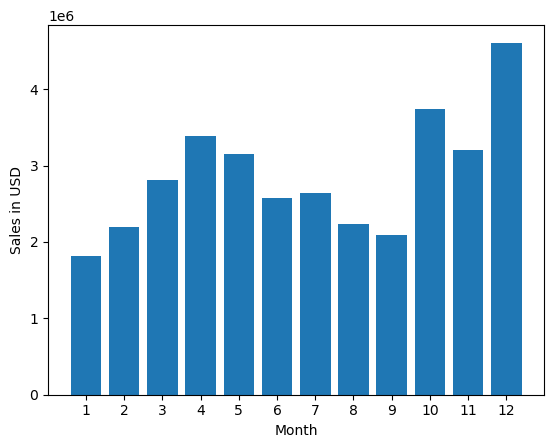

In [37]:
months = range(1,13)
sales = Data_2019.groupby(['Order Month']).sum()['Total Purchase'] # include 2020-01 since it is relatively insignificant

plt.bar(months, sales)
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.show

In [38]:
# Add a City column

Data_2019['City'] =''

Data_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time,Total Purchase,City
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",01,01,2019,03:07,11.99,
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",01,01,2019,03:40,11.95,
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",01,01,2019,04:56,150.00,
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",01,01,2019,05:53,2.99,
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",01,01,2019,06:03,23.90,


In [39]:
# could use the iterrows function like before. Or could use pandas apply function, which applies a function along an axis of the DataFrame.
# A lambda function is a small anonymous function. x here is the function, which splits the string in purchase address by ',' and gets the second element
Data_2019['City'] = Data_2019['Purchase Address'].apply(lambda x: x.split(',')[1])

In [40]:
Data_2019.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time,Total Purchase,City
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",01,01,2019,03:07,11.99,New York City
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",01,01,2019,03:40,11.95,San Francisco
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",01,01,2019,04:56,150.00,New York City
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",01,01,2019,05:53,2.99,Dallas
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",01,01,2019,06:03,23.90,Atlanta
5,141732,iPhone,1,700.00,01/01/19 06:13,"446 Pine St, Atlanta, GA 30301",01,01,2019,06:13,700.00,Atlanta
6,149620,Lightning Charging Cable,1,14.95,01/01/19 06:34,"338 Chestnut St, San Francisco, CA 94016",01,01,2019,06:34,14.95,San Francisco
7,142451,AAA Batteries (4-pack),1,2.99,01/01/19 06:41,"232 12th St, Boston, MA 02215",01,01,2019,06:41,2.99,Boston
8,146039,34in Ultrawide Monitor,1,379.99,01/01/19 07:24,"53 River St, San Francisco, CA 94016",01,01,2019,07:24,379.99,San Francisco
9,141316,AAA Batteries (4-pack),3,2.99,01/01/19 07:26,"235 South St, Seattle, WA 98101",01,01,2019,07:26,8.97,Seattle


In [41]:
# Create a column for state as well.
Data_2019['State'] =''

In [42]:
Data_2019['State'] = Data_2019['Purchase Address'].apply(lambda x: x.split(' ')[-2][0:2])

In [43]:
Data_2019.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time,Total Purchase,City,State
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",01,01,2019,03:07,11.99,New York City,NY
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",01,01,2019,03:40,11.95,San Francisco,CA
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",01,01,2019,04:56,150.00,New York City,NY
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",01,01,2019,05:53,2.99,Dallas,TX
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",01,01,2019,06:03,23.90,Atlanta,GA
5,141732,iPhone,1,700.00,01/01/19 06:13,"446 Pine St, Atlanta, GA 30301",01,01,2019,06:13,700.00,Atlanta,GA
6,149620,Lightning Charging Cable,1,14.95,01/01/19 06:34,"338 Chestnut St, San Francisco, CA 94016",01,01,2019,06:34,14.95,San Francisco,CA
7,142451,AAA Batteries (4-pack),1,2.99,01/01/19 06:41,"232 12th St, Boston, MA 02215",01,01,2019,06:41,2.99,Boston,MA
8,146039,34in Ultrawide Monitor,1,379.99,01/01/19 07:24,"53 River St, San Francisco, CA 94016",01,01,2019,07:24,379.99,San Francisco,CA
9,141316,AAA Batteries (4-pack),3,2.99,01/01/19 07:26,"235 South St, Seattle, WA 98101",01,01,2019,07:26,8.97,Seattle,WA


In [44]:
Data_2019.groupby(['State']).sum().sort_values('Total Purchase', ascending=False)['Total Purchase']

# State of California had the most sales

State
CA    13703047.83
NY     4661867.14
TX     4583418.29
MA     3658627.65
GA     2794199.07
WA     2745046.02
OR     1870010.56
ME      449321.38
Name: Total Purchase, dtype: float64

In [45]:
Data_2019.groupby(['State', 'City']).sum().sort_values('Total Purchase', ascending=False)['Total Purchase']

# San Francisco had the most sales for any city. However notice an issue, there are two cities with the same name in two different states.

State  City          
CA      San Francisco    8254743.55
        Los Angeles      5448304.28
NY      New York City    4661867.14
MA      Boston           3658627.65
GA      Atlanta          2794199.07
TX      Dallas           2765373.96
WA      Seattle          2745046.02
OR      Portland         1870010.56
TX      Austin           1818044.33
ME      Portland          449321.38
Name: Total Purchase, dtype: float64

In [46]:
# to easily differentiate these 2 cities, create a new column City, State

Data_2019['City+State'] = ''

Data_2019['City+State'] = Data_2019['Purchase Address'].apply(lambda x: x.split(',')[1] + " ," + x.split(' ')[-2][0:2])

Data_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time,Total Purchase,City,State,City+State
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",01,01,2019,03:07,11.99,New York City,NY,"New York City ,NY"
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",01,01,2019,03:40,11.95,San Francisco,CA,"San Francisco ,CA"
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",01,01,2019,04:56,150.00,New York City,NY,"New York City ,NY"
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",01,01,2019,05:53,2.99,Dallas,TX,"Dallas ,TX"
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",01,01,2019,06:03,23.90,Atlanta,GA,"Atlanta ,GA"


In [47]:
# check

Data_2019.groupby(['City+State']).sum().sort_values('Total Purchase', ascending=False)['Total Purchase']


City+State
 San Francisco ,CA    8254743.55
 Los Angeles ,CA      5448304.28
 New York City ,NY    4661867.14
 Boston ,MA           3658627.65
 Atlanta ,GA          2794199.07
 Dallas ,TX           2765373.96
 Seattle ,WA          2745046.02
 Portland ,OR         1870010.56
 Austin ,TX           1818044.33
 Portland ,ME          449321.38
Name: Total Purchase, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

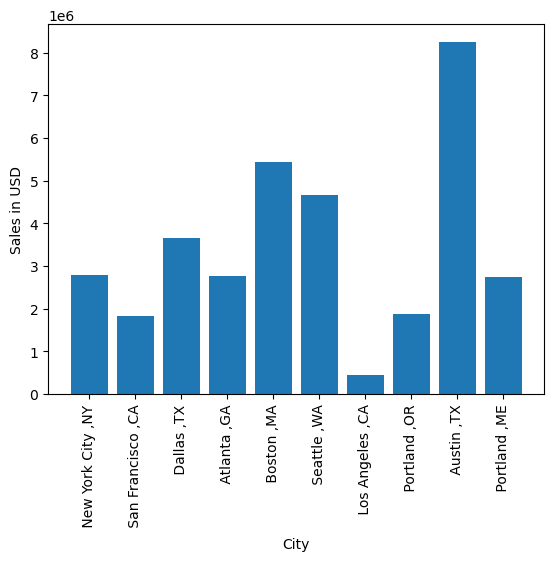

In [48]:
cities = Data_2019['City+State'].unique()
sales = Data_2019.groupby(['City+State']).sum()['Total Purchase']

plt.bar(cities, sales)
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.show

In [49]:
# notice the cities don't match the values in the plot due to different order between the variables cities and sales
print(cities)
print(sales)

[' New York City ,NY' ' San Francisco ,CA' ' Dallas ,TX' ' Atlanta ,GA'
 ' Boston ,MA' ' Seattle ,WA' ' Los Angeles ,CA' ' Portland ,OR'
 ' Austin ,TX' ' Portland ,ME']
City+State
 Atlanta ,GA          2794199.07
 Austin ,TX           1818044.33
 Boston ,MA           3658627.65
 Dallas ,TX           2765373.96
 Los Angeles ,CA      5448304.28
 New York City ,NY    4661867.14
 Portland ,ME          449321.38
 Portland ,OR         1870010.56
 San Francisco ,CA    8254743.55
 Seattle ,WA          2745046.02
Name: Total Purchase, dtype: float64


In [50]:
Data_2019.groupby(['City+State'])

cities = [city for city, df in Data_2019.groupby(['City+State'])]

cities

[' Atlanta ,GA',
 ' Austin ,TX',
 ' Boston ,MA',
 ' Dallas ,TX',
 ' Los Angeles ,CA',
 ' New York City ,NY',
 ' Portland ,ME',
 ' Portland ,OR',
 ' San Francisco ,CA',
 ' Seattle ,WA']

<function matplotlib.pyplot.show(close=None, block=None)>

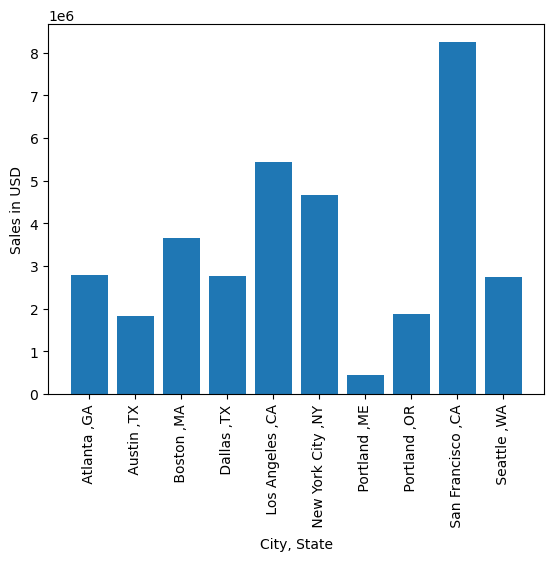

In [51]:
plt.bar(cities, sales)
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD')
plt.xlabel('City, State')
plt.show

In [52]:
# previously parsed string to order date and time, which works.
# but this is not a good idea if the order date format changes
# use a date time library

Data_2019['Order Date & Time'] = pd.to_datetime(Data_2019['Order Date & Time']) #conver to datetime data type

In [54]:
Data_2019.dtypes

Order ID                     object
Product                      object
Quantity Ordered              int64
Price Each                  float64
Order Date & Time    datetime64[ns]
Purchase Address             object
Order Month                  object
Order Day                    object
Order Year                   object
Order Time                   object
Total Purchase              float64
City                         object
State                        object
City+State                   object
dtype: object

In [53]:
Data_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time,Total Purchase,City,State,City+State
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",01,01,2019,03:07,11.99,New York City,NY,"New York City ,NY"
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",01,01,2019,03:40,11.95,San Francisco,CA,"San Francisco ,CA"
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",01,01,2019,04:56,150.00,New York City,NY,"New York City ,NY"
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",01,01,2019,05:53,2.99,Dallas,TX,"Dallas ,TX"
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",01,01,2019,06:03,23.90,Atlanta,GA,"Atlanta ,GA"


In [54]:
Data_2019['Order Hour'] = Data_2019['Order Date & Time'].dt.hour

In [55]:
# check after creating the column for hour

Data_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time,Total Purchase,City,State,City+State,Order Hour
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",01,01,2019,03:07,11.99,New York City,NY,"New York City ,NY",3
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",01,01,2019,03:40,11.95,San Francisco,CA,"San Francisco ,CA",3
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",01,01,2019,04:56,150.00,New York City,NY,"New York City ,NY",4
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",01,01,2019,05:53,2.99,Dallas,TX,"Dallas ,TX",5
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",01,01,2019,06:03,23.90,Atlanta,GA,"Atlanta ,GA",6


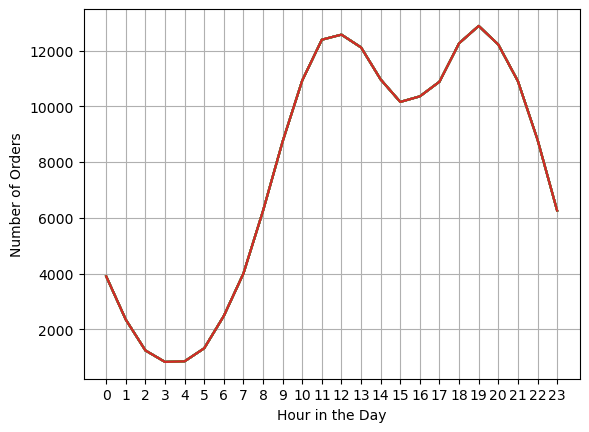

In [56]:
hours = [hour for hour, df in Data_2019.groupby(['Order Hour'])]

plt.plot(hours, Data_2019.groupby(['Order Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour in the Day')
plt.ylabel('Number of Orders')
plt.grid()

# visualize the number of orders by hour

In [57]:
# proof some order IDs have more than 1 product

Data_2019.tail(10).groupby(['Order ID']).count()

,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time,Total Purchase,City,State,City+State,Order Hour
Order ID,,,,,,,,,,,,,,
298344,1,1,1,1,1,1,1,1,1,1,1,1,1,1
299125,1,1,1,1,1,1,1,1,1,1,1,1,1,1
300519,2,2,2,2,2,2,2,2,2,2,2,2,2,2
304165,1,1,1,1,1,1,1,1,1,1,1,1,1,1
305840,1,1,1,1,1,1,1,1,1,1,1,1,1,1
306928,1,1,1,1,1,1,1,1,1,1,1,1,1,1
308185,1,1,1,1,1,1,1,1,1,1,1,1,1,1
316833,1,1,1,1,1,1,1,1,1,1,1,1,1,1
319308,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [58]:
Data_2019[Data_2019['Order ID'] == '300519']

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time,Total Purchase,City,State,City+State,Order Hour
185684,300519,Bose SoundSport Headphones,1,99.99,2020-01-01 05:13:00,"657 Spruce St, New York City, NY 10001",01,01,2020,05:13,99.99,New York City,NY,"New York City ,NY",5
185685,300519,Lightning Charging Cable,1,14.95,2020-01-01 05:13:00,"657 Spruce St, New York City, NY 10001",01,01,2020,05:13,14.95,New York City,NY,"New York City ,NY",5


In [59]:
# create sub dataframe with just duplicated Order IDs
# keep = False considers all of the same values as duplicates. Otherwise by default, it will not include the first row of duplicated values.

Multi_Item_Orders = Data_2019[Data_2019.duplicated(['Order ID'], keep = False)]

In [60]:
Multi_Item_Orders.shape

(14128, 15)

In [66]:
Multi_Item_Orders[Multi_Item_Orders['Order ID'] == '148074']

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time,Total Purchase,City,State,City+State,Order Hour
65,148074,Google Phone,1,600.00,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",01,01,2019,11:25,600.00,Atlanta,GA,"Atlanta ,GA",11
66,148074,USB-C Charging Cable,1,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",01,01,2019,11:25,11.95,Atlanta,GA,"Atlanta ,GA",11


In [67]:
# Check with original dataframe

In [68]:
Data_2019[Data_2019['Order ID'] == '148074']

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time,Total Purchase,City,State,City+State,Order Hour
65,148074,Google Phone,1,600.00,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",01,01,2019,11:25,600.00,Atlanta,GA,"Atlanta ,GA",11
66,148074,USB-C Charging Cable,1,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",01,01,2019,11:25,11.95,Atlanta,GA,"Atlanta ,GA",11


In [69]:
# what is the max number of different items bought together?

print('Order ID with most items is', Multi_Item_Orders.groupby(['Order ID']).count()['Product'].idxmax(),'\n')
print('with', Multi_Item_Orders.groupby(['Order ID']).count()['Product'].max(), 'items purchased')

Order ID with most items is 160873 

with 5 items purchased


In [70]:
# check
Multi_Item_Orders[Multi_Item_Orders['Order ID'] == '160873']

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time,Total Purchase,City,State,City+State,Order Hour
13515,160873,iPhone,1,700.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",02,10,2019,10:24,700.00,San Francisco,CA,"San Francisco ,CA",10
13516,160873,Lightning Charging Cable,1,14.95,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",02,10,2019,10:24,14.95,San Francisco,CA,"San Francisco ,CA",10
13517,160873,Apple Airpods Headphones,1,150.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",02,10,2019,10:24,150.00,San Francisco,CA,"San Francisco ,CA",10
13518,160873,Wired Headphones,1,11.99,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",02,10,2019,10:24,11.99,San Francisco,CA,"San Francisco ,CA",10
13519,160873,Google Phone,1,600.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",02,10,2019,10:24,600.00,San Francisco,CA,"San Francisco ,CA",10


In [71]:
# make another column that has all columns in the same group
# pandas transform function self producing a DataFrame with the same axis shape as self.

Multi_Item_Orders['Complete_Purchase'] = Multi_Item_Orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [72]:
# make another column that has combines total purchase amount
# pandas transform function self producing a DataFrame with the same axis shape as self.

Multi_Item_Orders['Complete_Purchase_Amount'] = Multi_Item_Orders.groupby('Order ID')['Total Purchase'].transform(lambda x: sum(x))

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [73]:
# check
Multi_Item_Orders[Multi_Item_Orders['Order ID'] == '160873']

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time,Total Purchase,City,State,City+State,Order Hour,Complete_Purchase,Complete_Purchase_Amount
13515,160873,iPhone,1,700.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",02,10,2019,10:24,700.00,San Francisco,CA,"San Francisco ,CA",10,"iPhone,Lightning Charging Cable,Apple Airpods ...",1476.94
13516,160873,Lightning Charging Cable,1,14.95,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",02,10,2019,10:24,14.95,San Francisco,CA,"San Francisco ,CA",10,"iPhone,Lightning Charging Cable,Apple Airpods ...",1476.94
13517,160873,Apple Airpods Headphones,1,150.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",02,10,2019,10:24,150.00,San Francisco,CA,"San Francisco ,CA",10,"iPhone,Lightning Charging Cable,Apple Airpods ...",1476.94
13518,160873,Wired Headphones,1,11.99,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",02,10,2019,10:24,11.99,San Francisco,CA,"San Francisco ,CA",10,"iPhone,Lightning Charging Cable,Apple Airpods ...",1476.94
13519,160873,Google Phone,1,600.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",02,10,2019,10:24,600.00,San Francisco,CA,"San Francisco ,CA",10,"iPhone,Lightning Charging Cable,Apple Airpods ...",1476.94


In [74]:
# drop out the duplicated occurances of same order IDs.ignore_index = True ensures the resultant df the index reset

Multi_Item_Orders.drop_duplicates(subset=['Order ID'], inplace=True, ignore_index=True)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [75]:
# check
Multi_Item_Orders[Multi_Item_Orders['Order ID'] == '160873']

,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time,Total Purchase,City,State,City+State,Order Hour,Complete_Purchase,Complete_Purchase_Amount
516,160873,iPhone,1,700.0,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",02,10,2019,10:24,700.0,San Francisco,CA,"San Francisco ,CA",10,"iPhone,Lightning Charging Cable,Apple Airpods ...",1476.94


In [76]:
print(Multi_Item_Orders.shape)
Multi_Item_Orders.head(20)

(6879, 17)


,Order ID,Product,Quantity Ordered,Price Each,Order Date & Time,Purchase Address,Order Month,Order Day,Order Year,Order Time,Total Purchase,City,State,City+State,Order Hour,Complete_Purchase,Complete_Purchase_Amount
0,144804,iPhone,1,700.00,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",01,01,2019,07:29,700.00,New York City,NY,"New York City ,NY",7,"iPhone,Wired Headphones",711.99
1,148074,Google Phone,1,600.00,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",01,01,2019,11:25,600.00,Atlanta,GA,"Atlanta ,GA",11,"Google Phone,USB-C Charging Cable",611.95
2,148450,iPhone,1,700.00,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",01,01,2019,12:02,700.00,Dallas,TX,"Dallas ,TX",12,"iPhone,Lightning Charging Cable",714.95
3,144679,Google Phone,1,600.00,2019-01-01 12:51:00,"984 Lakeview St, San Francisco, CA 94016",01,01,2019,12:51,600.00,San Francisco,CA,"San Francisco ,CA",12,"Google Phone,USB-C Charging Cable",611.95
4,147451,Google Phone,1,600.00,2019-01-01 12:57:00,"229 Elm St, New York City, NY 10001",01,01,2019,12:57,600.00,New York City,NY,"New York City ,NY",12,"Google Phone,Wired Headphones",611.99
5,143738,iPhone,1,700.00,2019-01-01 13:29:00,"462 Cedar St, Boston, MA 02215",01,01,2019,13:29,700.00,Boston,MA,"Boston ,MA",13,"iPhone,Lightning Charging Cable",714.95
6,142112,20in Monitor,1,109.99,2019-01-01 13:51:00,"625 Elm St, Boston, MA 02215",01,01,2019,13:51,109.99,Boston,MA,"Boston ,MA",13,"20in Monitor,Bose SoundSport Headphones",209.98
7,147198,Google Phone,1,600.00,2019-01-01 14:12:00,"858 13th St, Austin, TX 73301",01,01,2019,14:12,600.00,Austin,TX,"Austin ,TX",14,"Google Phone,USB-C Charging Cable",611.95
8,150335,iPhone,1,700.00,2019-01-01 14:32:00,"956 Madison St, Los Angeles, CA 90001",01,01,2019,14:32,700.00,Los Angeles,CA,"Los Angeles ,CA",14,"iPhone,Apple Airpods Headphones",850.00
9,142350,iPhone,1,700.00,2019-01-01 14:33:00,"956 Walnut St, Seattle, WA 98101",01,01,2019,14:33,700.00,Seattle,WA,"Seattle ,WA",14,"iPhone,Wired Headphones",711.99


In [77]:
# Referenced from: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in Multi_Item_Orders['Complete_Purchase']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [78]:
count = Counter()

for row in Multi_Item_Orders['Complete_Purchase']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3)))

count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 86),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5)]

In [ ]:
# clearly we see that the top 2 - 3 items that are purchase together are mobile phones, phone chargers and headphones.
# We should incentivise packages for purchasing these sets of items when a customer purchases a mobile phone (most exp item in the set)

In [79]:
Data_2019[['Product', 'Quantity Ordered', 'Total Purchase']].groupby(['Product']).sum().sort_values(by=['Quantity Ordered'], ascending=False)

,Quantity Ordered,Total Purchase
Product,,
AAA Batteries (4-pack),30986,92648.14
AA Batteries (4-pack),27615,106041.60
USB-C Charging Cable,23931,285975.45
Lightning Charging Cable,23169,346376.55
Wired Headphones,20524,246082.76
Apple Airpods Headphones,15637,2345550.00
Bose SoundSport Headphones,13430,1342865.70
27in FHD Monitor,7541,1131074.59
iPhone,6847,4792900.00


In [1]:
# The most often sold items are AAA and AA battery packs because they are used to power many common household appliances 
# like remotes and gaming controllers. However from a revenue standpoint, their contribution looks rather insignificant
# lets arrange based on total sales revenue

Data_2019[['Product', 'Quantity Ordered', 'Total Purchase']].groupby(['Product']).sum().sort_values(by=['Total Purchase'], ascending=False)

NameError: name 'Data_2019' is not defined

In [ ]:
# as suspected, the revenue obtained from the most-sold product is actually the least, and the devices such as phones
# and laptops. As such, the marketting focus should be on these products.

<function matplotlib.pyplot.show(close=None, block=None)>

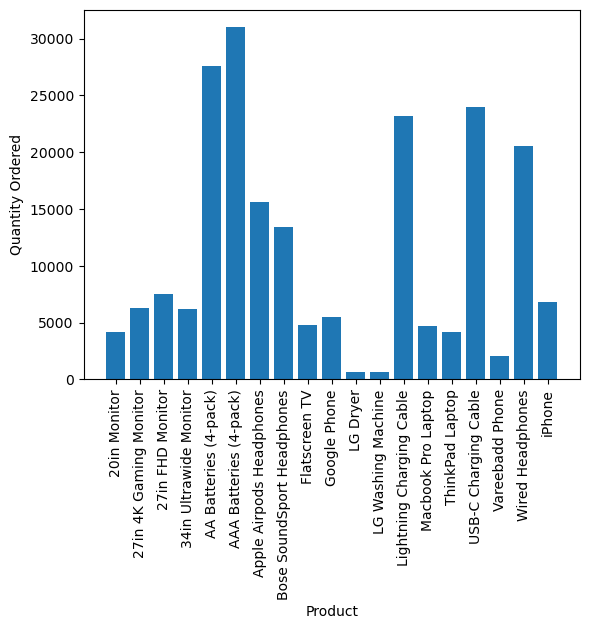

In [80]:
product_group = Data_2019.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == "":


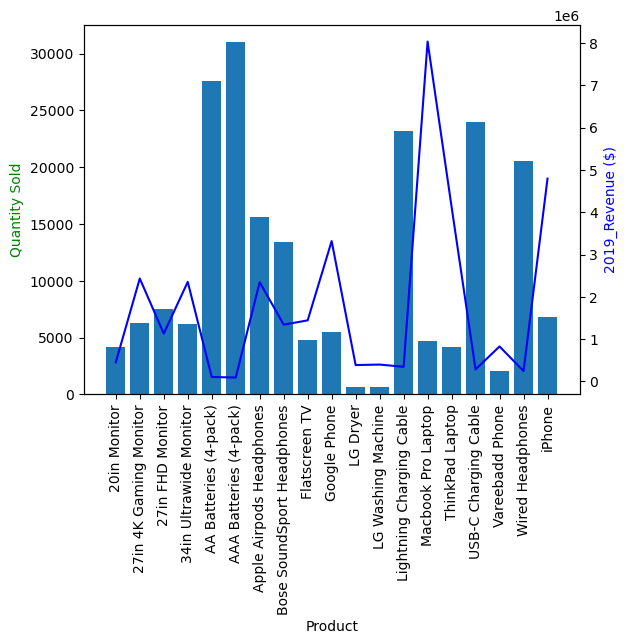

In [87]:
# lets add a second y-axis

revenue = Data_2019.groupby('Product').sum()['Total Purchase']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, revenue, 'b-')

ax1.set_xlabel('Product')
ax1.set_xticklabels(products, rotation='vertical')
ax1.set_ylabel('Quantity Sold', color='g')
ax2.set_ylabel('2019_Revenue ($)', color='b')

plt.show()

In [ ]:
# Generally there is a negative correlation between quantity of product ordered and revenue product generates